In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [22]:
data = pd.read_csv("./train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

dev_data = data[0:1000].T
train_data = data[1000:m].T

Ydev = dev_data[0]
Xdev = dev_data[1:n]
Xdev = Xdev / 255.0

Ytrain = train_data[0]
Xtrain = train_data[1:n]
Xtrain = Xtrain / 255.0

test_data = pd.read_csv("./test.csv")
test_data = np.array(test_data)
test_data=test_data.T
Ytest = test_data[0]
Xtest = test_data[1:n]
Xtest = Xtest / 255.0

In [23]:
def RELU(Z):
    return np.maximum(Z, 0)

def dRELU(Z):
    return Z > 0

def softmax(Z):
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [24]:
def initparam(X):
    m,n = X.shape
    W1 = np.random.rand(10, m) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def fpass(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def onehot(Y):
    ohY = np.zeros((Y.size, Y.max() + 1))
    ohY[np.arange(Y.size), Y] = 1
    ohY = ohY.T
    return ohY

In [25]:
def bpass(Z1, A1, Z2, A2, W1, W2, X, Y):
    ohY = onehot(Y)
    dZ2 = A2 - ohY
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRELU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparam(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1    
    W2 = W2 - lr * dW2  
    b2 = b2 - lr * db2    
    return W1, b1, W2, b2

def predict(Z):
    return np.argmax(Z, 0)

def accuracy(preds, Y):
    return np.sum(preds == Y) / Y.size

def cost(A2, ohY):
    m = A2.shape[1]
    c = -1 / m * np.sum(ohY * np.log(A2 + 1e-8))
    return c

In [26]:
def train(X, Y,Xd,Yd,lr, itr):
    W1, b1, W2, b2 = initparam(X)
    cost_hist=[]
    dcost_hist=[]
    for i in range(itr+1):
        Z1, A1, Z2, A2 = fpass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = bpass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparam(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        devZ1, devA1, devZ2, devA2 = fpass(W1, b1, W2, b2, Xd)
        
        cost_hist.append(cost(A2,onehot(Y)))
        dcost_hist.append(cost(devA2,onehot(Yd)))
        
        if i % 100 == 0:
            print("EPOCH: ", i)
            
            preds = predict(A2)
            devpreds = predict(devA2)
            print(f"TRAIN accuracy: {round(accuracy(preds, Y),3)}")
            print(f"DEV accuracy: {accuracy(devpreds, Yd)}")
                 
    return W1, b1, W2, b2, cost_hist, dcost_hist

def test(W1, b1, W2, b2, X, Y):
    Z1, A1, Z2, A2 = fpass(W1, b1, W2, b2, X)
    preds = predict(A2)
    print(f"TEST accuracy: {accuracy(preds, Y)}")
    
    test_labels = Y.flatten()
    preds = preds.flatten()
    
    f1 = f1_score(test_labels, preds, average='micro')
    print("The F1 score is", f1)

    cm = confusion_matrix(test_labels, preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    

In [27]:
def testsamples(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    _, _, _, A2 = fpass(W1, b1, W2, b2, current_image)
    prediction = predict(A2)
    label = Y[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

EPOCH:  0
TRAIN accuracy: 0.1
DEV accuracy: 0.131
EPOCH:  100
TRAIN accuracy: 0.618
DEV accuracy: 0.609
EPOCH:  200
TRAIN accuracy: 0.643
DEV accuracy: 0.641
EPOCH:  300
TRAIN accuracy: 0.679
DEV accuracy: 0.659
EPOCH:  400
TRAIN accuracy: 0.702
DEV accuracy: 0.668
EPOCH:  500
TRAIN accuracy: 0.717
DEV accuracy: 0.683
EPOCH:  600
TRAIN accuracy: 0.728
DEV accuracy: 0.691
EPOCH:  700
TRAIN accuracy: 0.738
DEV accuracy: 0.705
EPOCH:  800
TRAIN accuracy: 0.747
DEV accuracy: 0.713
EPOCH:  900
TRAIN accuracy: 0.755
DEV accuracy: 0.728
EPOCH:  1000
TRAIN accuracy: 0.761
DEV accuracy: 0.741
EPOCH:  1100
TRAIN accuracy: 0.766
DEV accuracy: 0.749
EPOCH:  1200
TRAIN accuracy: 0.77
DEV accuracy: 0.752


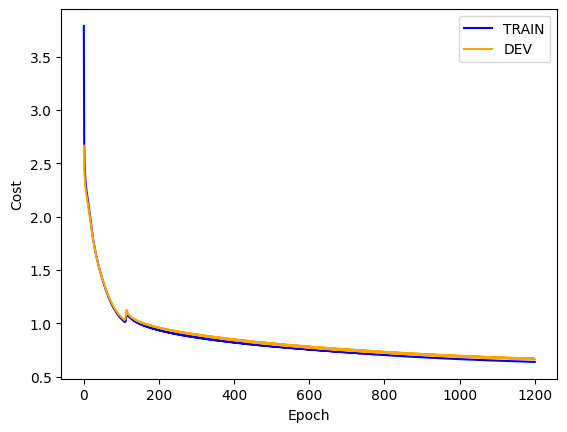

In [28]:
W1, b1, W2, b2, costs, dcosts = train(Xtrain, Ytrain, Xdev, Ydev, 0.1, 1200)

plt.plot(range(len(costs)), costs, color='blue', label='TRAIN')
plt.plot(range(len(dcosts)), dcosts, color='orange', label='DEV')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

TEST accuracy: 0.7598
The F1 score is 0.7598


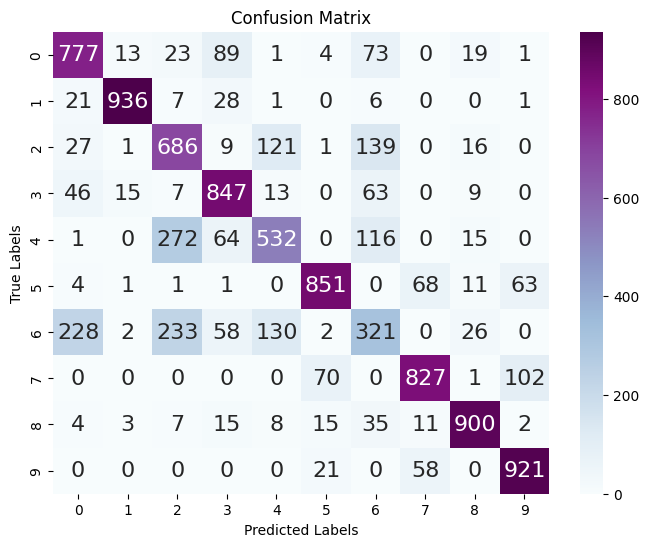

In [29]:
test(W1, b1, W2, b2, Xtest, Ytest)

Prediction:  [2]
Label:  2


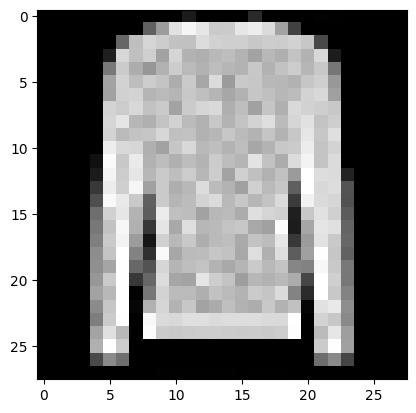

Prediction:  [1]
Label:  1


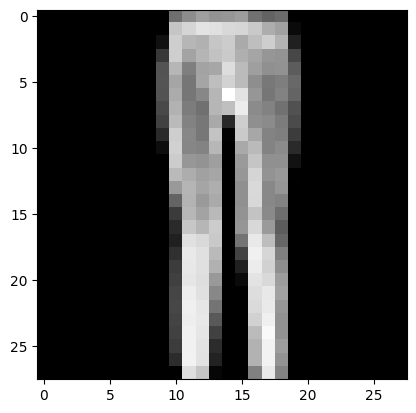

Prediction:  [1]
Label:  1


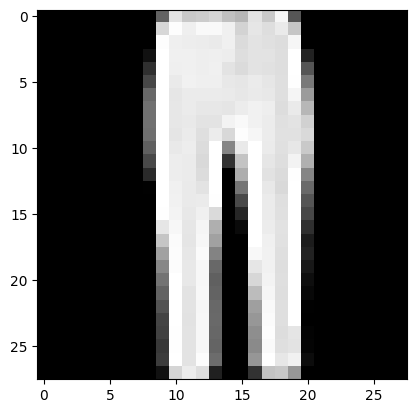

Prediction:  [3]
Label:  3


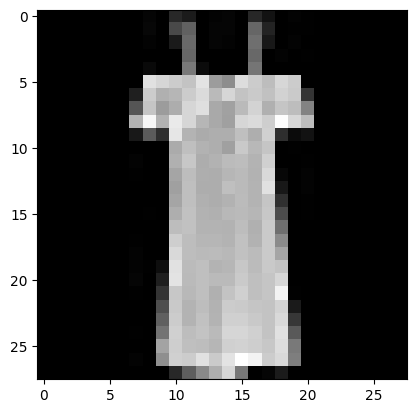

Prediction:  [5]
Label:  8


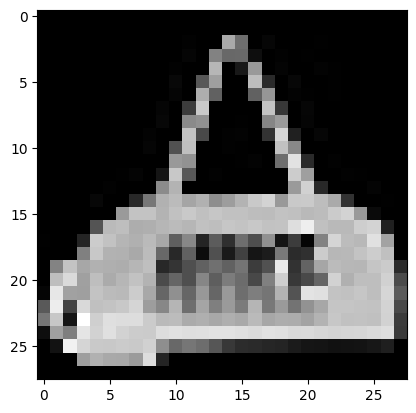

In [30]:
testsamples(0,Xtrain,Ytrain,W1,b1,W2,b2)
testsamples(1,Xtrain,Ytrain,W1,b1,W2,b2)
testsamples(2,Xtrain,Ytrain,W1,b1,W2,b2)
testsamples(3,Xtrain,Ytrain,W1,b1,W2,b2)
testsamples(4,Xtrain,Ytrain,W1,b1,W2,b2)